In [ ]:
# setting datasets library
!pip install datasets


# Preprocessig imdb dataset

In [ ]:
from datasets import load_dataset

# Load dataset IMDb
dataset = load_dataset('imdb')

print(dataset)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


In [ ]:
# Example to data acceptance
train_data = dataset['train']
print(train_data[0])


{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [ ]:
# Dataset data preprocessing

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

In [ ]:
# Parametes
max_features = 20000
maxlen = 200
batch_size = 32

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [ ]:
# preprocessing, padding sequences
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [ ]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


x_train shape: (25000, 200)
x_test shape: (25000, 200)


# LSTM NN

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 128, input_length=maxlen))
model_lstm.add(LSTM(128, recurrent_dropout=0.2, return_sequences=True))
model_lstm.add(LSTM(64, recurrent_dropout=0.2))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dropout(0.25))
model_lstm.add(Dense(1, activation='sigmoid'))

In [ ]:
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 128)          2560000   
                                                                 
 lstm_5 (LSTM)               (None, 200, 128)          131584    
                                                                 
 lstm_6 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2745217 (10.47 MB)
Trainable params: 274

In [ ]:
# model compilation
model_lstm.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history_lstm = model_lstm.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 955s 1s/step - loss: 0.4379 - accuracy: 0.7954 - val_loss: 0.6596 - val_accuracy: 0.7950
Epoch 2/5
782/782 [==============================] - 940s 1s/step - loss: 0.2486 - accuracy: 0.9070 - val_loss: 0.3524 - val_accuracy: 0.8580
Epoch 3/5
782/782 [==============================] - 947s 1s/step - loss: 0.1703 - accuracy: 0.9363 - val_loss: 0.3929 - val_accuracy: 0.8392
Epoch 4/5
782/782 [==============================] - 952s 1s/step - loss: 0.1942 - accuracy: 0.9289 - val_loss: 0.4426 - val_accuracy: 0.8462
Epoch 5/5
782/782 [==============================] - 932s 1s/step - loss: 0.1209 - accuracy: 0.9571 - val_loss: 0.4469 - val_accuracy: 0.8408


In [ ]:
predictions = model_lstm.predict(x_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Predicted: {binary_predictions[i]}, In fact: {y_test[i]}")

782/782 [==============================] - 120s 152ms/step
Predicted: 0, In fact: 0
Predicted: 1, In fact: 1
Predicted: 0, In fact: 1
Predicted: 0, In fact: 0
Predicted: 1, In fact: 1
Predicted: 1, In fact: 1
Predicted: 1, In fact: 1
Predicted: 0, In fact: 0
Predicted: 1, In fact: 0
Predicted: 1, In fact: 1


In [ ]:
# quolity score
score, acc = model_lstm.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Results of testing:')
print('Тesting loss:', score)
print('Тesting accuracy:', acc)

782/782 [==============================] - 120s 153ms/step - loss: 0.4469 - accuracy: 0.8408
Results of testing:
Тesting loss: 0.44688692688941956
Тesting accuracy: 0.8407999873161316


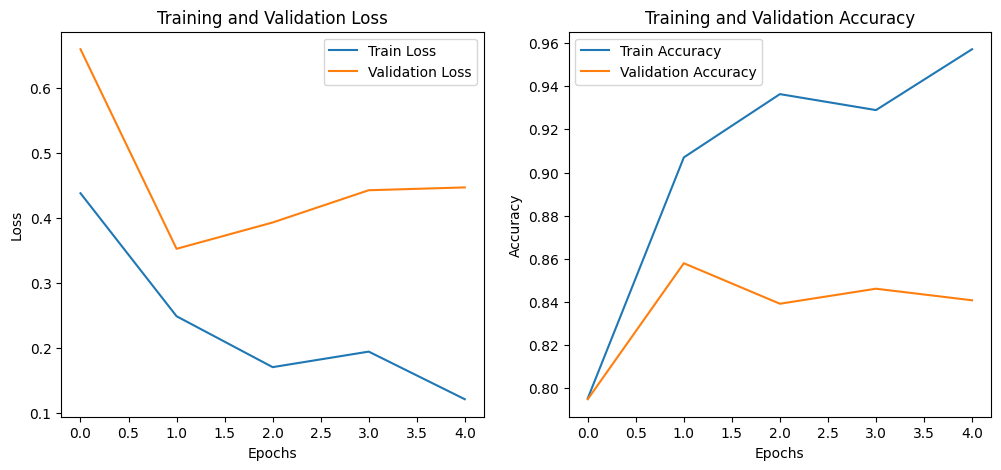

In [ ]:
# visualization of accuracy and loss

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# SimpleRNN

In [ ]:
# model building
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 128, input_length=maxlen))
model_rnn.add(SimpleRNN(128, recurrent_dropout=0.2, return_sequences=True))
model_rnn.add(SimpleRNN(64, recurrent_dropout=0.1))
model_rnn.add(Dense(64, activation='relu'))

model_rnn.add(Dense(1, activation='sigmoid'))

In [ ]:
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          2560000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 200, 128)          32896     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2609473 (9.95 MB)
Trainable params: 2609473 (9.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# model compilation
model_rnn.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# model fitting
hystory_rnn=model_rnn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 255s 318ms/step - loss: 0.7036 - accuracy: 0.4987 - val_loss: 0.7049 - val_accuracy: 0.4966
Epoch 2/10
782/782 [==============================] - 252s 322ms/step - loss: 0.6991 - accuracy: 0.4988 - val_loss: 0.7063 - val_accuracy: 0.4967
Epoch 3/10
782/782 [==============================] - 249s 319ms/step - loss: 0.6973 - accuracy: 0.4946 - val_loss: 0.6967 - val_accuracy: 0.5000
Epoch 4/10
782/782 [==============================] - 251s 321ms/step - loss: 0.6961 - accuracy: 0.4969 - val_loss: 0.6932 - val_accuracy: 0.5038
Epoch 5/10
782/782 [==============================] - 249s 318ms/step - loss: 0.6952 - accuracy: 0.5004 - val_loss: 0.6932 - val_accuracy: 0.4973
Epoch 6/10
782/782 [==============================] - 253s 324ms/step - loss: 0.6819 - accuracy: 0.5390 - val_loss: 0.6122 - val_accuracy: 0.6659
Epoch 7/10
782/782 [==============================] - 249s 319ms/step - loss: 0.5470 - accuracy: 0.7260 - val_loss: 0.5422 -

In [ ]:
predictions_1 = model_rnn.predict(x_test)

binary_predictions_1 = [1 if pred > 0.5 else 0 for pred in predictions_1]

for i in range(10):
    print(f"Predicted: {binary_predictions_1[i]}, in fact: {y_test[i]}")

782/782 [==============================] - 47s 59ms/step
Predicted: 1, in fact: 0
Predicted: 1, in fact: 1
Predicted: 0, in fact: 1
Predicted: 0, in fact: 0
Predicted: 1, in fact: 1
Predicted: 0, in fact: 1
Predicted: 1, in fact: 1
Predicted: 0, in fact: 0
Predicted: 0, in fact: 0
Predicted: 1, in fact: 1


In [ ]:
# model score
score, acc = model_rnn.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Results of testing:')
print('Тesting loss:', score)
print('Тesting accuracy:', acc)

782/782 [==============================] - 38s 49ms/step - loss: 0.4866 - accuracy: 0.7789
Results of testing:
Тesting loss: 0.48662108182907104
Тesting accuracy: 0.7789199948310852


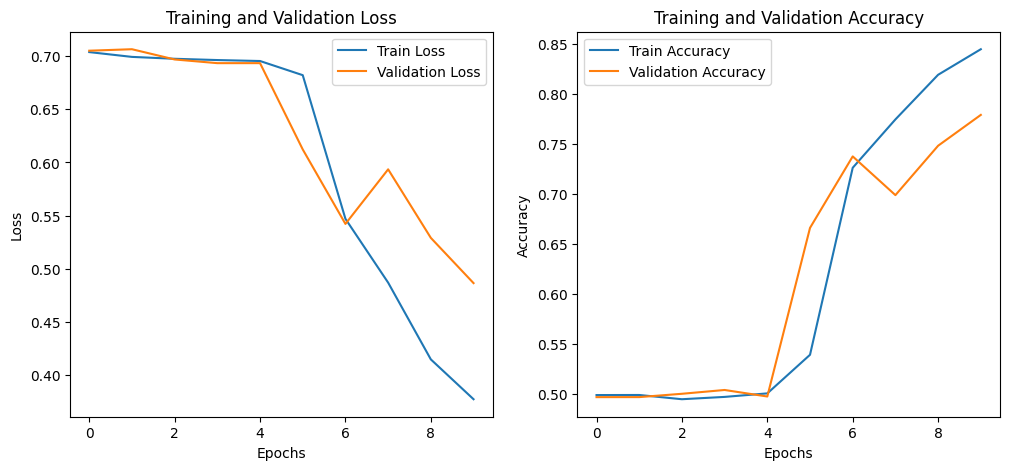

In [ ]:
# visualization of accuracy and loss

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(hystory_rnn.history['loss'], label='Train Loss')
plt.plot(hystory_rnn.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hystory_rnn.history['accuracy'], label='Train Accuracy')
plt.plot(hystory_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# BRNN

In [ ]:
max_features = 20000
embedding_size = 128
maxlen = 200
lstm_units = 64
dropout_rate = 0.2
epochs = 5

In [ ]:
model_bid_rnn = Sequential()
model_bid_rnn.add(Embedding(max_features, embedding_size, input_length=maxlen))
model_bid_rnn.add(Bidirectional(LSTM(lstm_units, recurrent_dropout=dropout_rate, return_sequences=True)))
model_bid_rnn.add(Bidirectional(LSTM(lstm_units, recurrent_dropout=dropout_rate)))
model_bid_rnn.add(Dense(64, activation='relu'))
model_bid_rnn.add(Dense(32, activation='relu'))
model_bid_rnn.add(Dropout(0.25))
model_bid_rnn.add(Dense(1, activation='sigmoid'))

In [ ]:
model_bid_rnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          2560000   
                                                                 
 bidirectional_2 (Bidirecti  (None, 200, 128)          98816     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)               

In [ ]:
model_bid_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_bid_rnn = model_bid_rnn.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 1032s 1s/step - loss: 0.4578 - accuracy: 0.7919 - val_loss: 0.3461 - val_accuracy: 0.8606
Epoch 2/5
782/782 [==============================] - 1003s 1s/step - loss: 0.2690 - accuracy: 0.8998 - val_loss: 0.3942 - val_accuracy: 0.8493
Epoch 3/5
782/782 [==============================] - 1004s 1s/step - loss: 0.1628 - accuracy: 0.9440 - val_loss: 0.3674 - val_accuracy: 0.8642
Epoch 4/5
782/782 [==============================] - 1003s 1s/step - loss: 0.1061 - accuracy: 0.9653 - val_loss: 0.5557 - val_accuracy: 0.8270
Epoch 5/5
782/782 [==============================] - 1011s 1s/step - loss: 0.0762 - accuracy: 0.9754 - val_loss: 0.5404 - val_accuracy: 0.8510


In [ ]:
predictions_2 = model_bid_rnn.predict(x_test)

binary_predictions_2 = [1 if pred > 0.5 else 0 for pred in predictions_2]

for i in range(10):
    print(f"Predicted: {binary_predictions_2[i]}, In fact: {y_test[i]}")

782/782 [==============================] - 142s 181ms/step
Predicted: 0, In fact: 0
Predicted: 1, In fact: 1
Predicted: 1, In fact: 1
Predicted: 0, In fact: 0
Predicted: 1, In fact: 1
Predicted: 1, In fact: 1
Predicted: 0, In fact: 1
Predicted: 0, In fact: 0
Predicted: 1, In fact: 0
Predicted: 1, In fact: 1


In [ ]:
score, acc = model_bid_rnn.evaluate(x_test, y_test, batch_size=batch_size)
print('Test loss:', score)
print('Test accuracy:', acc)

782/782 [==============================] - 141s 180ms/step - loss: 0.5404 - accuracy: 0.8510
Test loss: 0.540406346321106
Test accuracy: 0.8510000109672546


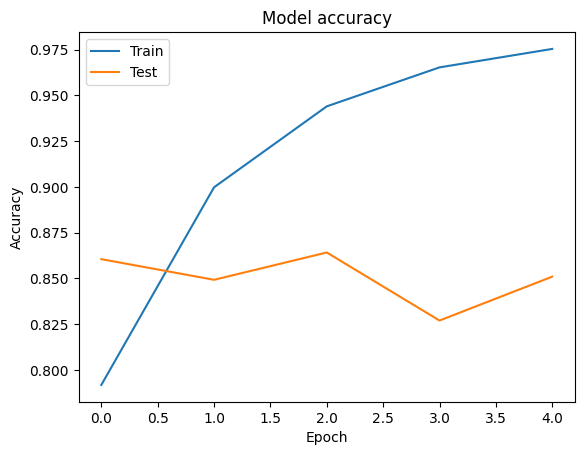

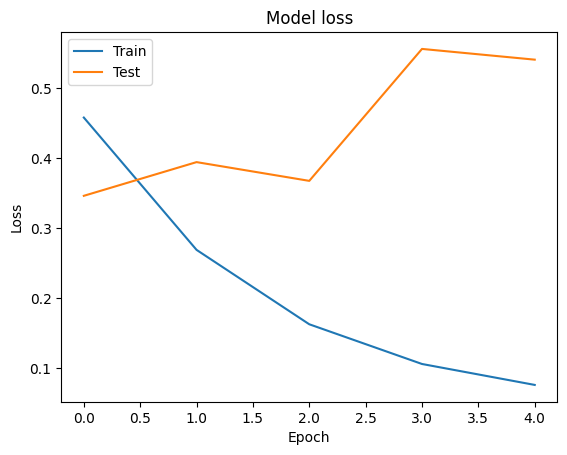

In [ ]:
#  Plot training & validation accuracy values
plt.plot(history_bid_rnn.history['accuracy'])
plt.plot(history_bid_rnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_bid_rnn.history['loss'])
plt.plot(history_bid_rnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Deep RNN

In [ ]:
max_features = 20000
embedding_size = 128
maxlen = 200
lstm_units = 64
dropout_rate = 0.2
epochs = 5

In [ ]:
# Build the model
model_drnn = Sequential()
model_drnn.add(Embedding(max_features, embedding_size, input_length=maxlen))
model_drnn.add(Bidirectional(LSTM(lstm_units, recurrent_dropout=dropout_rate, return_sequences=True)))


model_drnn.add(LSTM(lstm_units, recurrent_dropout=dropout_rate, return_sequences=True))
model_drnn.add(LSTM(lstm_units, recurrent_dropout=dropout_rate))

model_drnn.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model_drnn.add(Dense(1, activation='sigmoid'))

In [ ]:
model_drnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_drnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          2560000   
                                                                 
 bidirectional (Bidirection  (None, 200, 128)          98816     
 al)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 200, 64)           49408     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                        

In [ ]:
history_drnn = model_drnn.fit(x_train, y_train,
                             batch_size=32,
                             epochs=5,
                             validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 1004s 1s/step - loss: 0.5139 - accuracy: 0.7908 - val_loss: 0.4980 - val_accuracy: 0.7620
Epoch 2/5
782/782 [==============================] - 969s 1s/step - loss: 0.2884 - accuracy: 0.8933 - val_loss: 0.3492 - val_accuracy: 0.8608
Epoch 3/5
782/782 [==============================] - 980s 1s/step - loss: 0.2341 - accuracy: 0.9177 - val_loss: 0.3723 - val_accuracy: 0.8600
Epoch 4/5
782/782 [==============================] - 974s 1s/step - loss: 0.1542 - accuracy: 0.9483 - val_loss: 0.4288 - val_accuracy: 0.8540
Epoch 5/5
782/782 [==============================] - 977s 1s/step - loss: 0.1116 - accuracy: 0.9662 - val_loss: 0.4208 - val_accuracy: 0.8482


In [ ]:
predictions_3 = model_drnn.predict(x_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions_3 = [1 if pred > 0.5 else 0 for pred in predictions_3]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Predicted: {binary_predictions_3[i]}, In fact: {y_test[i]}")

782/782 [==============================] - 142s 180ms/step
Predicted: 0, In fact: 0
Predicted: 1, In fact: 1
Predicted: 1, In fact: 1
Predicted: 0, In fact: 0
Predicted: 1, In fact: 1
Predicted: 1, In fact: 1
Predicted: 1, In fact: 1
Predicted: 0, In fact: 0
Predicted: 1, In fact: 0
Predicted: 1, In fact: 1


In [ ]:
score, acc = model_drnn.evaluate(x_test, y_test, batch_size=32)
print('Test loss:', score)
print('Test accuracy:', acc)

782/782 [==============================] - 135s 172ms/step - loss: 0.4208 - accuracy: 0.8482
Test loss: 0.4207979738712311
Test accuracy: 0.8482400178909302


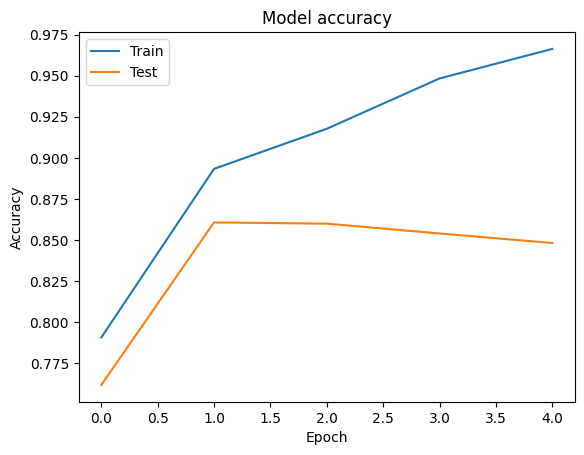

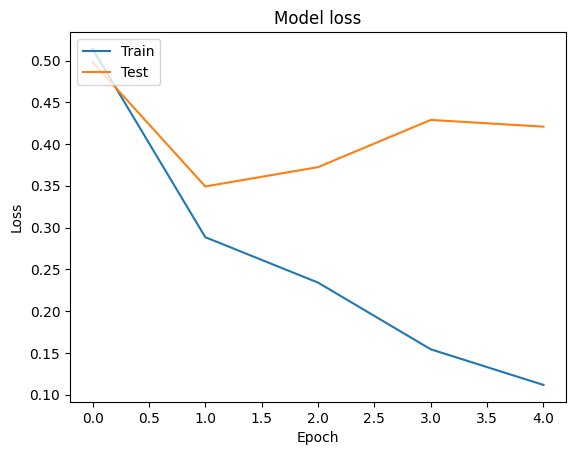

In [ ]:
#  Plot training & validation accuracy values
plt.plot(history_drnn.history['accuracy'])
plt.plot(history_drnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_drnn.history['loss'])
plt.plot(history_drnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Conclusion**. Building neural networks with different layers (LSTM, Bidirectional, Deep). In each case, I tried several options related to regularizers (dropout layers, kernel_regularizer=l2(0.01)) and the number of layers, both LSTM, Bidirectional, SimpleRNN, and internal (Dense). The general pattern was good training of training data and slow and poor training of test data. I never understood the reason for poor training of test data. Each time I reloaded the notebook, gave different names to the models, increased and decreased regularization, the number of applied layers, but it looked like the test data had already been trained before fitting the model. That is, the accuracy immediately reached a maximum and then stopped or even decreased. At the same time, the moose in the training data steadily decreased, while in the test data they remained high and even grew from somewhere around the 3rd epoch. The model with LSTM and DeepRNNN layers performed best, which also had LSTM inside. SimpleRNN and BRNN trained worse on the test data, especially the two-sided one. The network with Simple RNN still seems to have overtrained, but only because it practically removed the regularizers and simplified the model, and the test data did not change at the beginning either.